# Handwritting Recognition

## Imports and Load data

In [72]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 932.9 kB/s eta 0:00:12
   -- ------------------------------------- 0.8/11.3 MB 819.2 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/11.3 MB 819.2 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/11.3 MB 825.2 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.3 MB 799.2 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.3 MB 799.2 kB/s eta 0:00:13
   ----- ---------------------------------- 1.6/11.3 MB 762.9 kB/s eta 0:00:13
   ----- ---------------------------------- 1.6/

In [73]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
print("Modules Imported")

Modules Imported


In [56]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


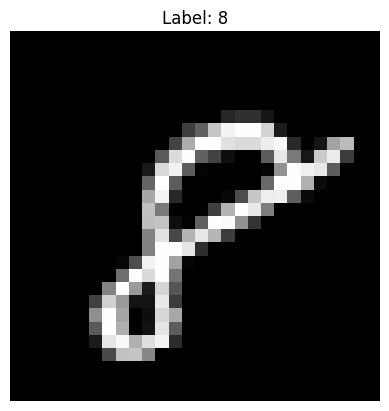

In [57]:
plt.imshow(X_train[60000-1], cmap='gray')
plt.title(f"Label: {y_train[60000-1]}")
plt.axis("off")
plt.show()

## Normalize and Reshape

In [58]:
X_train = X_train/255.0
X_test = X_test / 255.0

In [59]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape)

(60000, 28, 28, 1)


## Build model

In [60]:
model = Sequential([
    
    Input(shape=(28,28,1)),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print("Compiled")

Compiled


### Training Part

In [62]:
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.9567 - loss: 0.1406 - val_accuracy: 0.9811 - val_loss: 0.0580
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9857 - loss: 0.0460 - val_accuracy: 0.9888 - val_loss: 0.0372
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9903 - loss: 0.0314 - val_accuracy: 0.9899 - val_loss: 0.0295
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9902 - val_loss: 0.0281
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 32ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9902 - val_loss: 0.0317


In [92]:
#Save model
model.save("../models/mnist_cnn_model.keras")

# Confusion matrix

In [71]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
[[ 976    0    0    0    0    0    2    1    1    0]
 [   0 1133    0    1    0    0    1    0    0    0]
 [   3    0 1015    0    3    0    0    9    2    0]
 [   0    0    1 1007    0    1    0    1    0    0]
 [   0    0    0    0  969    0    2    0    2    9]
 [   1    0    0    7    0  882    1    0    1    0]
 [   2    2    0    0    1    1  952    0    0    0]
 [   0    4    1    0    0    0    0 1020    1    2]
 [   5    0    0    1    1    0    2    2  959    4]
 [   0    3    0    1    2    4    0    6    4  989]]


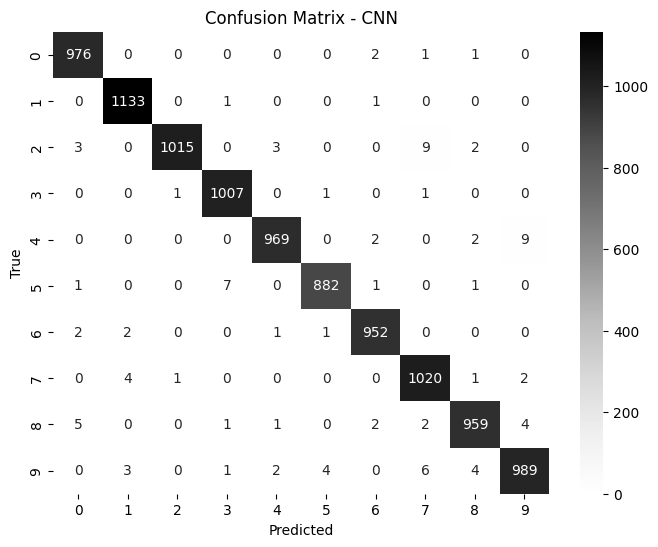

In [81]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - CNN")
plt.show()

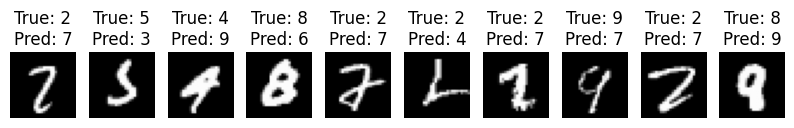

In [89]:
wrong = np.where(y_test != y_pred_classes)[0]

plt.figure(figsize=(10,15))

for i in range(10):
    idx = wrong[i]
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis("off")

plt.show()